# Orbits: Self Organizing Maps

In [1]:
"""
    TITLE   : Self Organizing Maps
    PROJECT : Stream Tracks
""";

__author__ = 'Nathaniel Starkman'

<span style='font-size:30px;font-weight:650'>
    About
</span>

Using SOM to order "observations" along an integrated orbit of the sun in a Milky Way-like potential. The data, in Galactocentric Cartesian coordinates, is convolved with gaussians in each dimension to reasonably simulate the scatter observed in cold stellar streams.

<br><br>

- - - 


## Prepare

### Imports

In [2]:
# CUSTOM QUICK LOADER

from utilipy import ipython

ipython.set_autoreload(2)
ipython.run_imports(
    base=True, astropy=True, galpy=True,
    matplotlib=True, plotly=True
)


# BUILT-IN

import sys; sys.path.insert(0, "../../")  # noqa


# THIRD PARTY

# PROJECT-SPECIFIC

from streamtrack.examples import make_noisy_orbit_data, make_ordered_orbit_data
from streamtrack import preprocessing as prep


set autoreload to 1
set autoreload to 2


In [3]:
rng = np.random.default_rng()

### Data

In [4]:
osc = make_ordered_orbit_data()
data = make_noisy_orbit_data()
clrO = np.linspace(0, 256, len(data))

In [18]:
trace_orbit = go.Scatter3d(
    x=osc.x, y=osc.y, z=osc.z,
    name="orbit", mode="lines", marker=dict(color='black')
)

trace_data = go.Scatter3d(
    x=data.x, y=data.y, z=data.z,
    name="noisy", mode="markers", marker=dict(color=clrO)
)

layout = go.Layout(width=700, height=700)

fig = go.Figure(
    data=[trace_orbit, trace_data],
    layout=layout
)
fig.show()


<br><br>

- - - 


## Self Organizing Map

### Starting point

In [19]:
start_point, start_ind, tree = prep.find_starting_point(
    data, np.array((-5.1, -2, 0.)).reshape(1, -1),
    return_kdtree=True
)

data = prep.set_starting_point(data, start_ind)
start_ind = 0

In [20]:
trace_start = go.Scatter3d(
    x=data.x[0], y=data.y[0], z=data.z[0], marker=dict(color="cyan")
)

layout = go.Layout(width=700, height=700)

fig = go.Figure(
    data=[trace_orbit, trace_data, trace_start],
    layout=layout
)
fig.show()



### Apply SOM

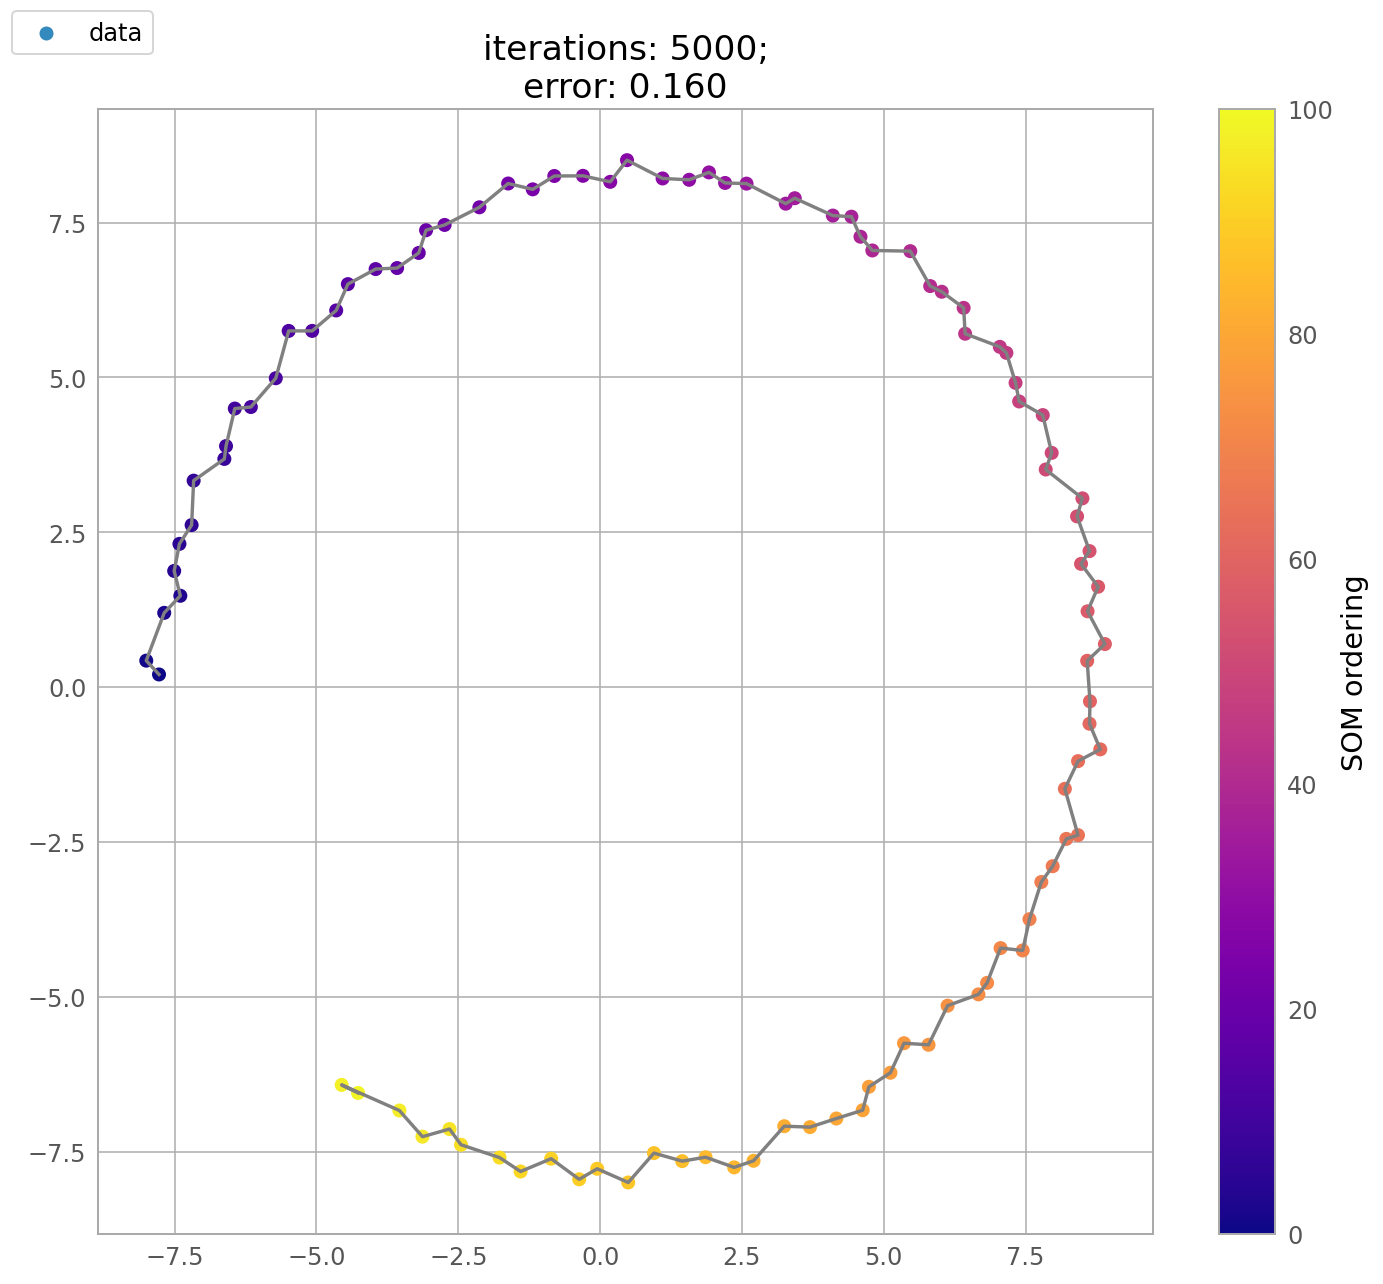

In [10]:
visit_order = prep.apply_SOM(
    data,
    learning_rate=1.5, sigma=15,
    iterations=int(5e3), random_seed=20, plot=True,
    reorder=start_ind
)

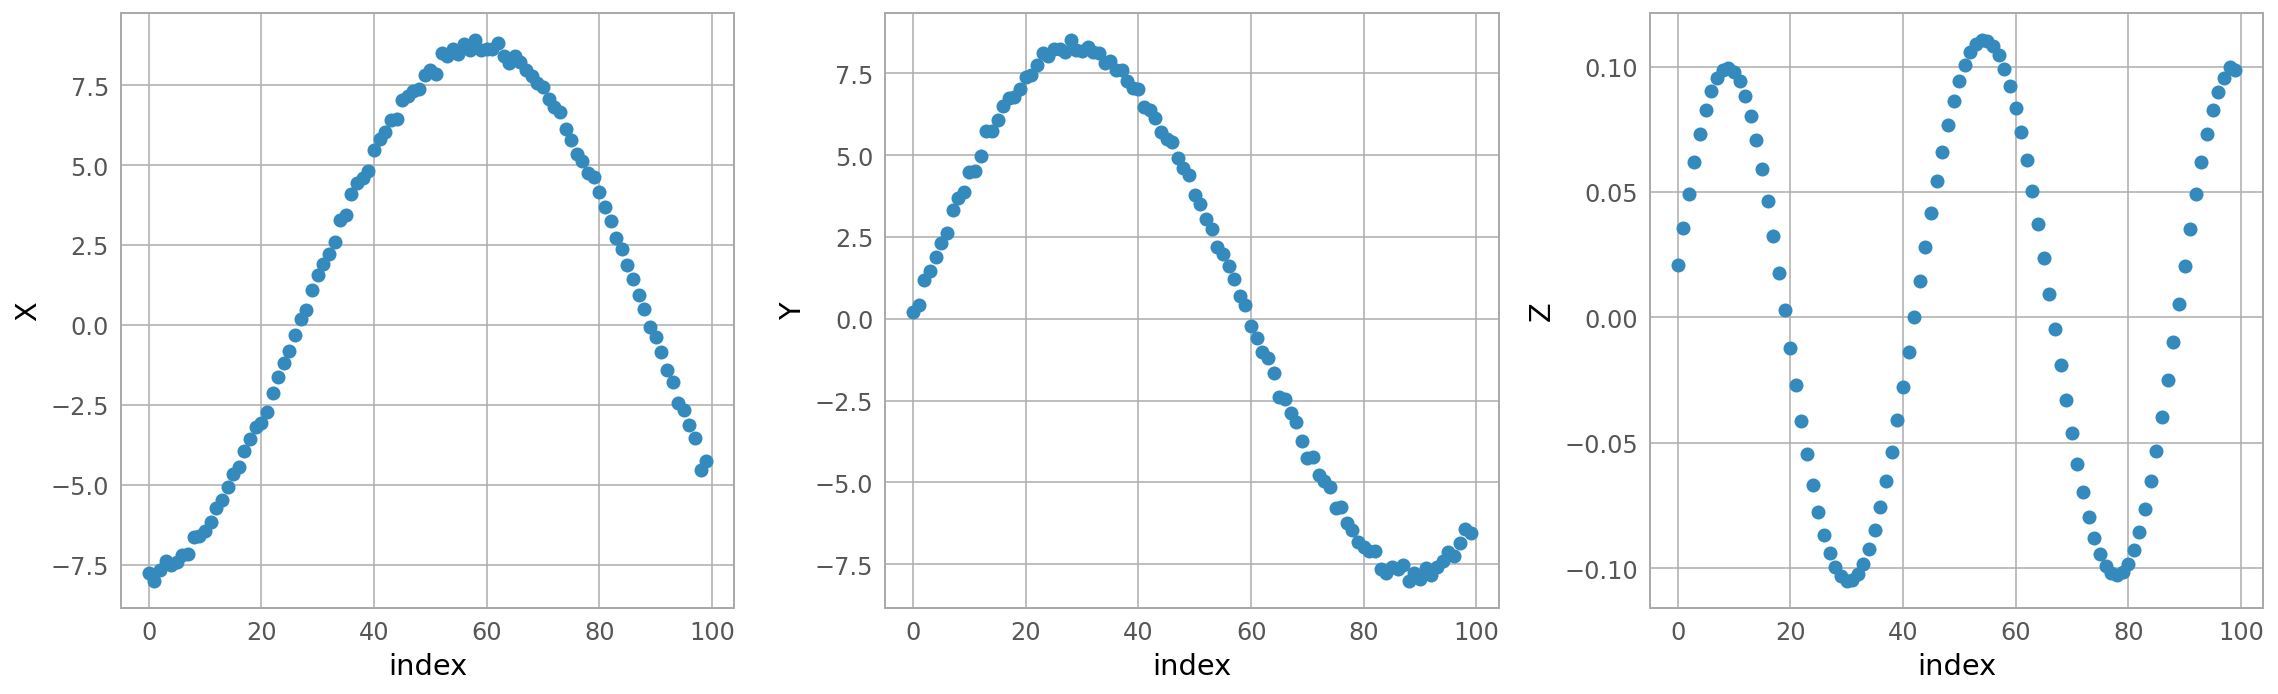

In [11]:
x = np.arange(len(visit_order))

fig, axs = plt.subplots(1, 3, figsize=(16, 5))
axs[0].scatter(x, data[visit_order].x)
axs[0].set_xlabel("index")
axs[0].set_ylabel("X")

axs[1].scatter(x, data[visit_order].y)
axs[1].set_xlabel("index")
axs[1].set_ylabel("Y")

axs[2].scatter(x, data[visit_order].z)
axs[2].set_xlabel("index")
axs[2].set_ylabel("Z")

plt.tight_layout()
plt.show();

<br><br>

- - - 


## Repeat

100%|██████████| 10/10 [00:02<00:00,  4.91it/s]


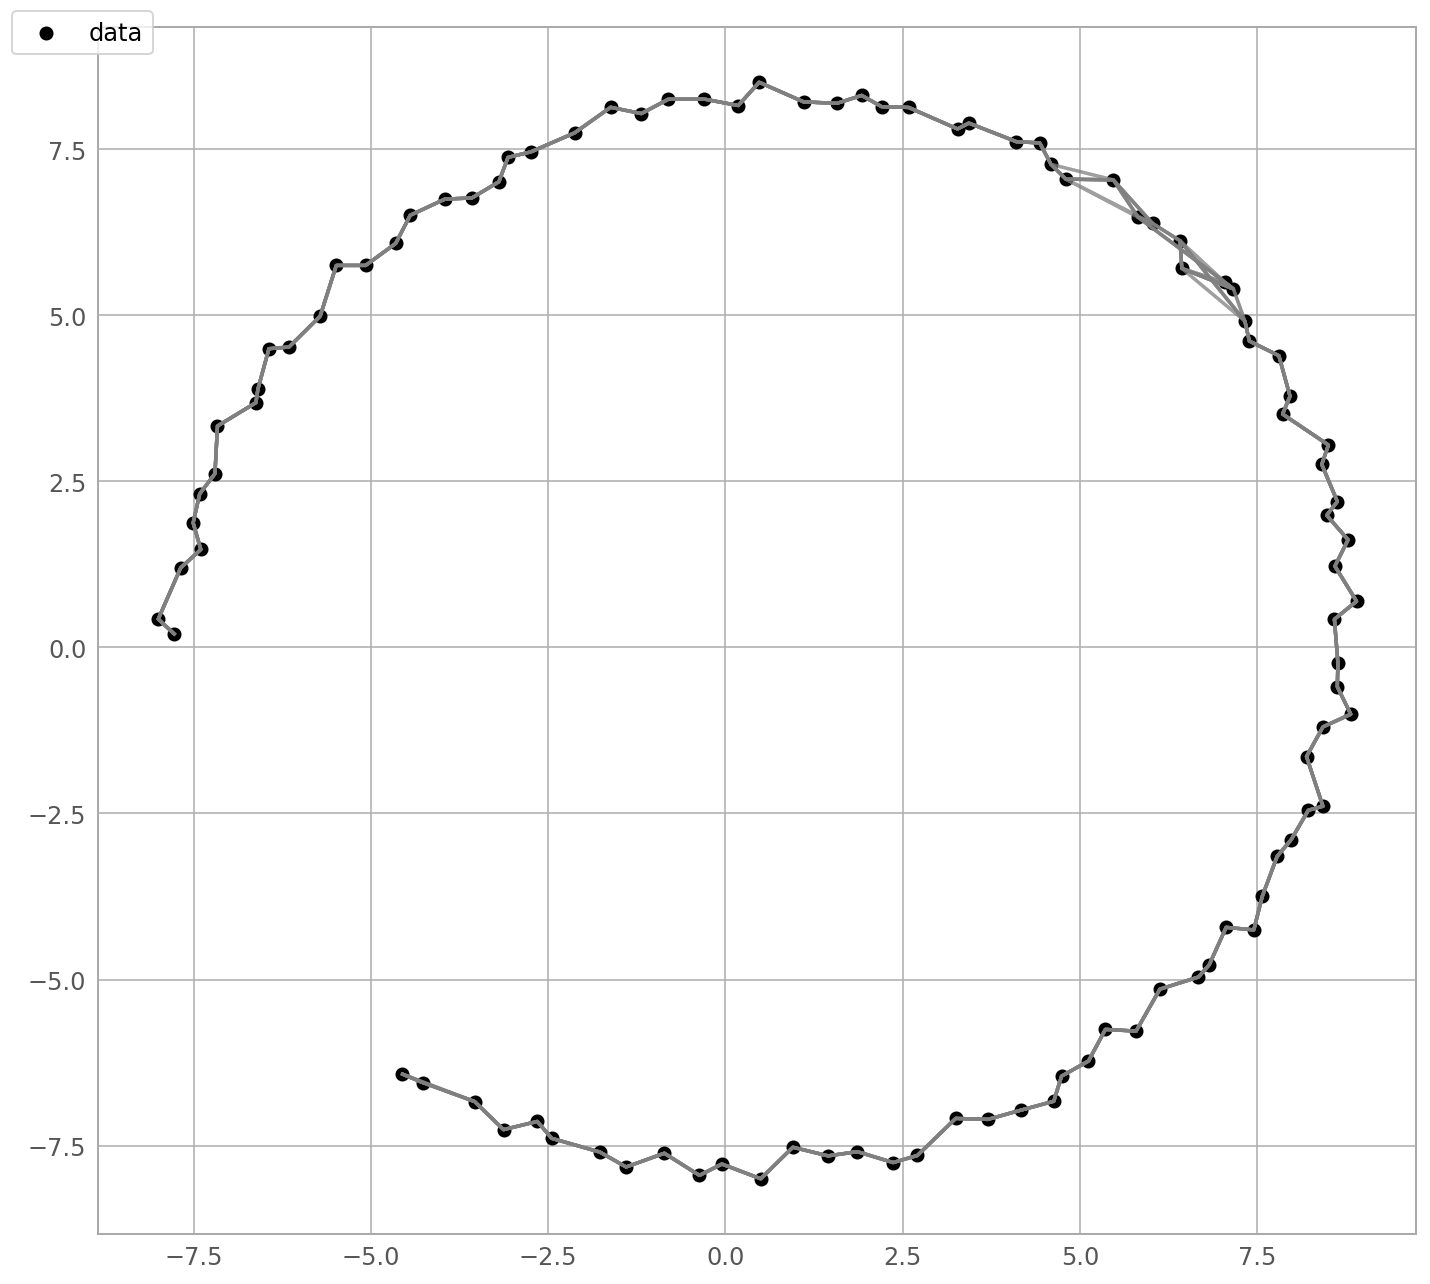

CPU times: user 3.69 s, sys: 109 ms, total: 3.8 s
Wall time: 2.3 s


In [21]:
%%time

visit_orders = prep.apply_SOM_repeat(
    data,
    iterations=int(3e3),
    learning_rate=1.5, sigma=15,
    plot=True,
    random_seeds=np.arange(0, 10, 1),
    reorder=start_ind,
    _tqdm=True,
)


In [13]:
trmat = prep.make_transition_matrix(visit_orders)

test_orders = prep.draw_ordering(trmat, num=5)
# test_orders = prep.draw_most_probable_ordering(trmat)[None]

# len(test_orders[0]), len(np.unique(test_orders[0]))


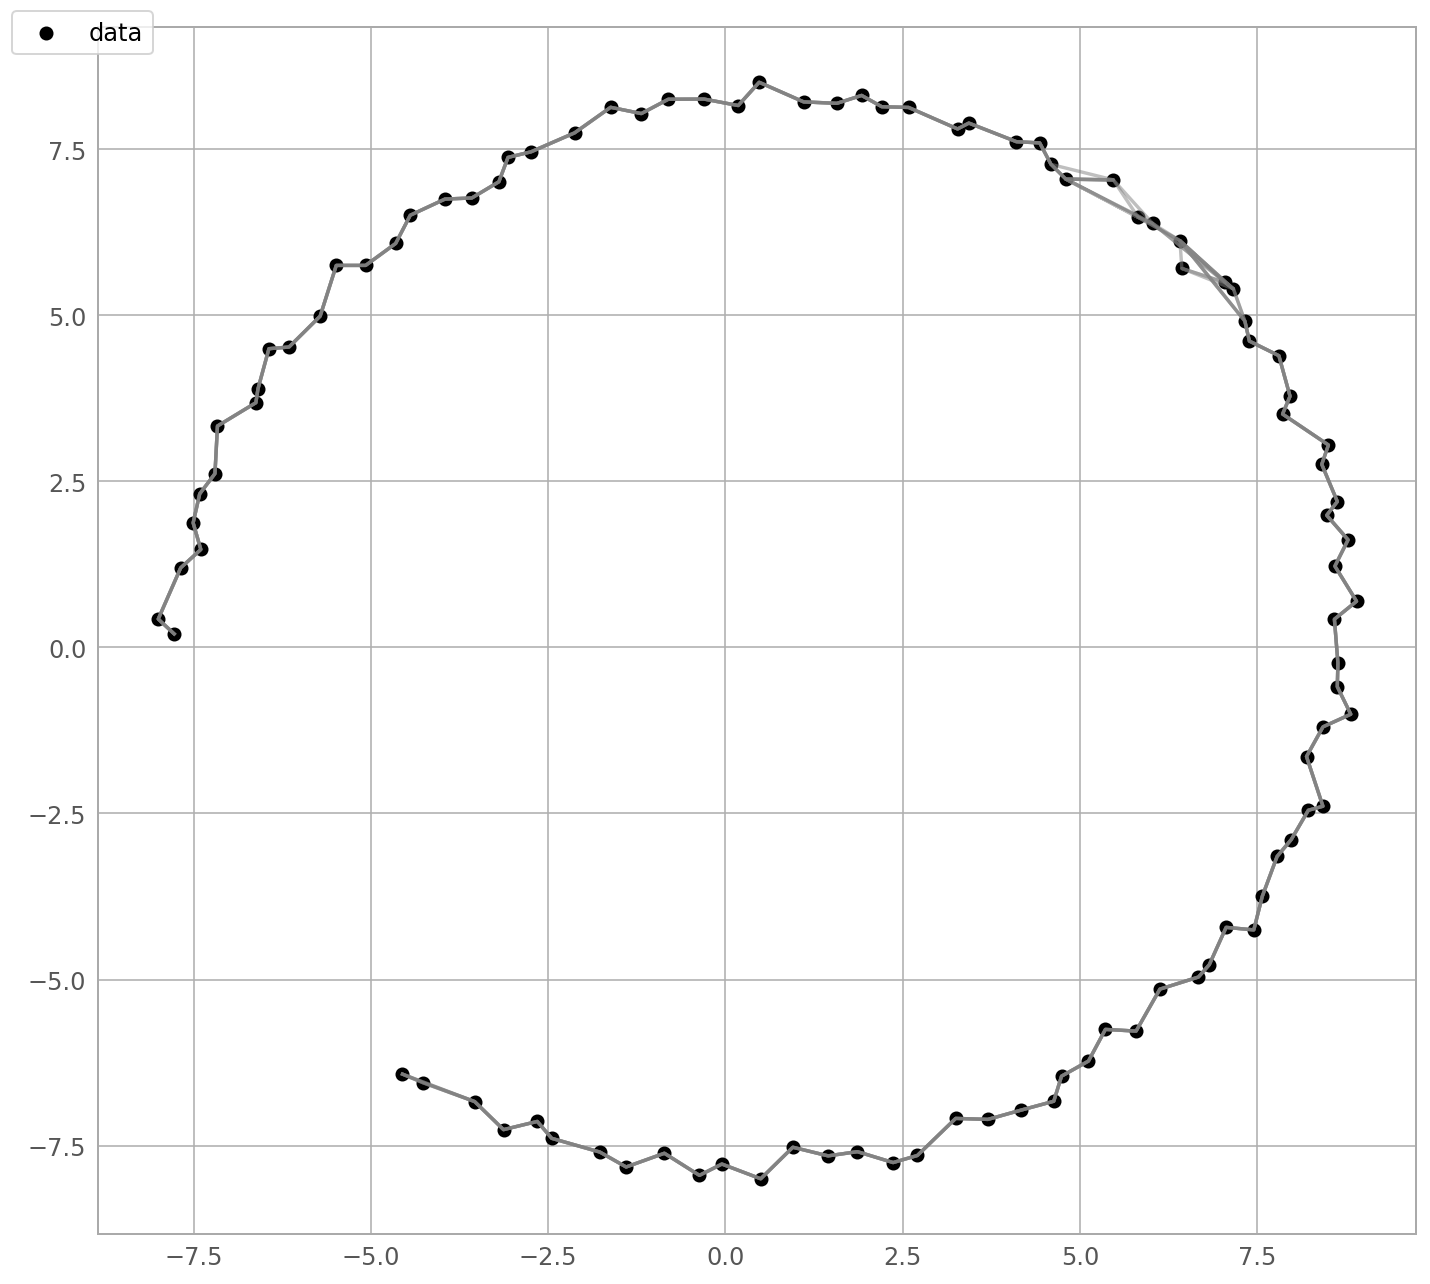

In [16]:
fig, ax = plt.subplots(figsize=(10, 9))

data2 = data._values.view("f8").reshape(-1, len(data.components))

ax.scatter(
    data2[:, 0],
    data2[:, 1],
    c="k",
    vmax=len(data2),
    cmap="plasma",
    label="data",
)

for order in test_orders:
    ax.plot(data2[order][:, 0], data2[order][:, 1], c="gray", alpha=0.5)

fig.legend(loc="upper left")
fig.tight_layout()
plt.show();


<br><br>

- - - 

<span style='font-size:40px;font-weight:650'>
  END
</span>